# Import libary

In [1]:
# !pip install opencv-python

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv
import json

In [2]:
cv.__version__

'4.5.5'

# Read data

In [3]:
# 데이터 불러옴 
file_name = 'right_data.csv'
vectors = np.zeros((423,81920))

In [4]:
# 데이터를 읽는과정
r = open(file_name,mode = 'r')
lines = r.readlines()

In [5]:
# 보고싶은면 ; 풀기
lines[0]

'17.392,17.349,17.436,17.522,17.544,17.587,17.738,17.825,17.825,17.825,17.911,17.868,17.868,17.868,17.954,18.105,18.083,18.319,18.491,18.641,19.302,20.274,22.665,27.99,39.456,46.835,50.575,52.92,53.409,52.476,50.414,48.711,47.793,47.579,47.957,47.99,47.1,44.324,39.509,27.226,19.408,18.362,18.083,17.889,17.803,17.544,17.717,17.63,17.565,17.501,17.306,17.392,17.565,17.803,17.825,17.868,17.868,17.868,17.868,17.868,17.825,17.825,17.889,17.889,17.932,17.846,17.825,17.846,17.868,17.868,17.825,17.803,17.889,17.889,17.803,17.825,17.846,17.846,17.825,17.825,17.803,17.63,17.609,17.501,17.565,17.674,17.652,17.695,17.587,17.76,17.76,17.803,17.825,17.846,17.825,17.825,17.803,17.781,17.738,17.781,17.738,17.717,17.652,17.76,17.781,17.76,17.803,17.76,17.846,17.652,17.738,17.781,17.674,17.695,17.609,17.717,17.674,17.674,17.63,17.652,17.652,17.738,17.781,17.825,17.825,17.76,17.781,17.803,17.846,17.868,17.803,17.803,17.803,17.803,17.781,17.76,17.781,17.803,17.803,17.781,17.76,17.738,17.695,17.717,17.738,

# Create Data vector 
##### 423X81920 으로 만드는 과정

In [6]:
for data in range(0,423):
    numbers = lines[data].split(',')
    flir_vector = []
    
    for i in range(0,81920):
        flir_vector.append(float(numbers[i]))
        
    vectors[data,:] = np.transpose(flir_vector)

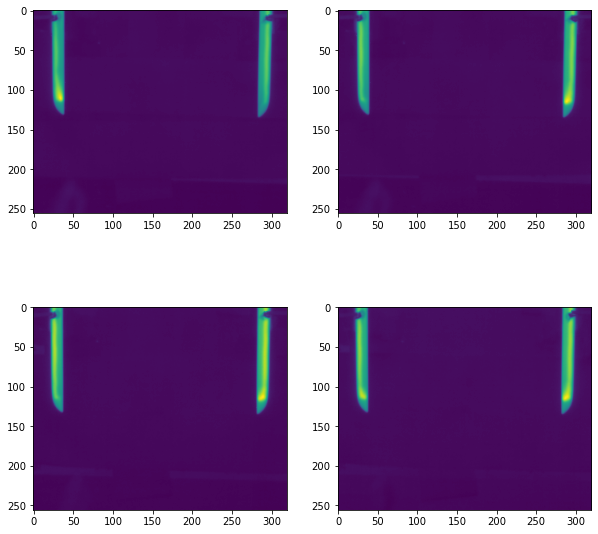

In [7]:
##############데이터를 256X320 으로 reshape해서 볼수있다.################
######보고싶을때 주석해제#############

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(np.reshape(vectors[1,:],[256,320]))
plt.subplot(2,2,2)
plt.imshow(np.reshape(vectors[12,:],[256,320]))
plt.subplot(2,2,3)
plt.imshow(np.reshape(vectors[60,:],[256,320]))
plt.subplot(2,2,4)
plt.imshow(np.reshape(vectors[100,:],[256,320]))
plt.show()

# Using contour

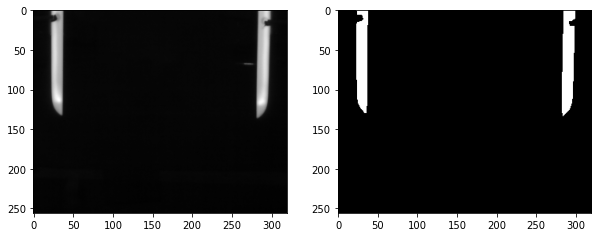

In [8]:
flir_image = np.zeros((423, 256, 320)); # 위에서 만든 vector를 reshape해서 넣어줄 프레임
cont_image = np.zeros((423, 256, 320)); # 픽셀 값이 0으로만 구성된, 검은색 배경에 contour가 그려질 예정

for  i in range(0,423):
    flir_image[i]       =  np.reshape(vectors[i,:],[256,320])
    ret, mask           =  cv.threshold(flir_image[i], 41, 255, cv.THRESH_BINARY)
                        # Intensity값이 41보다 크면 255로 만들고, 그 외의 값이면 0으로 만들어주는 Type(THRESH_BINARY)  
    mask                =  cv.convertScaleAbs(mask)
                        # 각각의 값을 절대값화시키고 정수화 시키는 작업
    contours, hierarchy =  cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    for contour in contours :
        img_cont  = cv.drawContours(cont_image[i], [contour], -1, 255, thickness = -1)
    cont_image[i] = img_cont

# 이미지로 결과 확인(보고싶으면 보기)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(flir_image[422], 'gray') # 원본 이미지
plt.subplot(1,2,2)
plt.imshow(cont_image[422], 'gray') # contour 진행한 이미지
                                    # countour 안을 채워 줌(thickness < 0). contour 바깥 영역은 0, contour영역은 다 255)

In [9]:
cont_image[1][10]   # 첫 번째 Image의 10번째 행(256X320 중에서)의 값들을 다 가져옴.

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 255., 255., 255., 255.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

# Masking Image

59.25

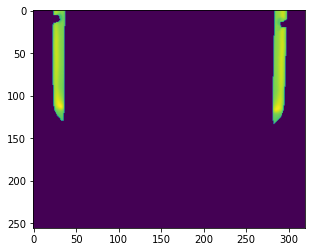

In [16]:
# 컨투어 딴 부분에 대한 원본 데이터의 인텐시티를 뽑아 내 저장하기 위해, and 연산을 사용.
Mask_image = cv.bitwise_and(flir_image, cont_image) #AND 조건으로 원본 & 컨투어 부분 0인부분은 다 0이됨

plt.imshow(Mask_image[422])    # 마스크된 이미지 (원본 이미지에서, 컨투어 딴 부분만 살아남고 나머지는 삭제된 이미지)
Mask_image[422].max()          # 마스크가 잘 됐는지 확인하기 위해 최대값을 관측. 255가 아니라, intensity 값이 출력됨을 관측.

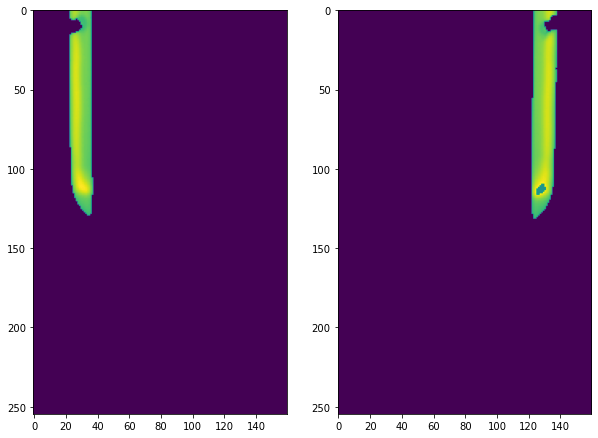

In [20]:
# 사진 분할 : 왼쪽과 오른쪽 부분으로 나누는 과정

flir_left = np.zeros((423, 255, 160));
flir_right = np.zeros((423, 255, 160));

for i in range(0,423):
    flir_left[i]  = Mask_image[i][0:255, 0:160]
    flir_right[i] = Mask_image[i][0:255,160:320]

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(flir_left[100])
plt.subplot(1,2,2)
plt.imshow(flir_right[100])

# Feature Extraction

In [19]:
# 각각의 사진에서 모든 픽셀에 접근하는 것이 아니라, intensity 값을 가지고 있는 픽셀에만 접근하기 위한 부분

# data = 사진에서, intensity 값을 가지고 있는 픽셀의 데이터만을 벡터 형태로 할당하기 위한 프레임
# count = 사진에서 intensity 값을 나타내는 픽셀의 개수를 저장
# 각 사진 별로 count 값은 상이하므로, 이를 data_length 안에 리스트로 저장

data = np.zeros((423, 2000))

count = 0
data_length = []

for num in range(0, 423) :
    for images in flir_right[num] :
        for i in images :
            if i > 1 :
                data[num][count] = i
                count = count + 1
                
    data_length.append(count)
    count = 0

In [24]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,43.50,46.75,48.75,49.00,49.50,50.25,52.00,54.00,56.25,57.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43.50,47.00,49.00,49.50,49.75,50.75,52.50,54.75,57.00,58.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44.25,47.50,49.00,49.50,49.75,50.75,52.25,54.50,56.50,57.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42.50,46.50,48.25,49.00,49.25,50.25,51.75,53.75,56.25,57.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,42.75,47.00,48.75,49.50,49.75,50.50,52.25,54.25,56.50,57.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,43.25,47.00,48.50,49.25,49.50,50.25,51.00,52.50,53.75,54.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,43.25,46.75,48.50,49.00,49.25,50.00,50.75,52.25,53.50,54.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,43.50,47.00,48.75,49.50,49.75,50.25,51.25,52.50,54.00,54.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,43.00,46.75,48.50,49.00,49.25,49.75,50.50,51.75,53.25,54.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df.to_csv("PreProcessed_Image_R_Data.csv",mode='a',index=False, header=False)

***


In [13]:
# Feature Extraction
from scipy.stats import skew, kurtosis

rms_temp = 0
sra_temp = 0
abs_sum  = 0

# Time Features
rms = np.zeros(423)
sra = np.zeros(423)
kv  = np.zeros(423)
sv  = np.zeros(423)
p2p = np.zeros(423)
Cf  = np.zeros(423)
If  = np.zeros(423)
Sf  = np.zeros(423)
Kf  = np.zeros(423)

# Arithmetic Statistics Featurs
max = np.zeros(423)
min = np.zeros(423)
mean = np.zeros(423)

# Userdefine Feature
count_intensity = np.zeros(423)

count_thresh = 50
count_pixel = 0

for i in range(0, 423) :
    for j in range(data_length[i]) :
        rms_temp = rms_temp + data[i][j]*data[i][j]
        sra_temp = sra_temp + np.sqrt(abs(data[i][j]))
        abs_sum  = abs_sum + abs(data[i][j])
        
        if data[i][j] > count_thresh :
            count_pixel = count_pixel + 1
        
    rms[i] = np.sqrt(rms_temp/data_length[i])
    sra[i] = pow((sra_temp/data_length[i]),2)
    kv[i]  = kurtosis(data[i][0:j])
    sv[i]  = skew(data[i][0:j])
    p2p[i] = np.ptp(data[i][0:j])
    Cf[i]  = abs(data[i][0:j]).max()/rms[i]
    If[i]  = abs(data[i][0:j]).max()/(abs_sum/data_length[i])
    Sf[i]  = abs(data[i][0:j]).max()/sra[i]
    Kf[i]  = kv[i]/pow(rms[i],4)
    
    max[i] = data[i][0:j].max()
    min[i] = data[i][0:j].min()
    mean[i] = data[i][0:j].mean()
    
    count_intensity[i] = count_pixel
       
    rms_temp = 0
    sra_temp = 0
    abs_sum  = 0
    
    count_pixel = 0

In [14]:
# 저장 잘 되어 있는지 한번 확인해봐
p2p

array([17.5 , 18.  , 17.25, 17.5 , 17.  , 17.5 , 17.25, 17.25, 17.5 ,
       17.5 , 17.5 , 17.5 , 31.5 , 31.75, 21.75, 31.75, 31.75, 31.75,
       31.75, 31.5 , 31.75, 31.75, 31.75, 31.75, 31.75, 31.75, 31.75,
       31.75, 22.  , 31.75, 31.75, 31.75, 31.75, 31.5 , 31.5 , 31.75,
       31.75, 31.75, 31.5 , 31.75, 31.75, 31.75, 31.75, 31.75, 31.75,
       31.75, 31.75, 31.75, 19.75, 20.  , 21.75, 19.5 , 20.25, 21.25,
       19.75, 21.75, 22.5 , 20.  , 21.  , 31.5 , 31.75, 22.5 , 31.75,
       21.5 , 20.5 , 22.  , 22.  , 21.75, 21.75, 22.75, 19.  , 21.5 ,
       21.  , 21.25, 22.75, 22.  , 22.75, 22.25, 31.75, 21.75, 22.75,
       31.75, 23.  , 22.  , 22.75, 22.5 , 22.5 , 22.75, 31.75, 31.75,
       31.75, 31.75, 31.75, 31.75, 31.75, 31.75, 31.75, 31.75, 31.75,
       31.75, 31.5 , 31.75, 31.75, 31.75, 11.75, 12.75, 13.  , 12.5 ,
       13.  , 15.  , 12.75, 12.5 , 12.25, 12.5 , 13.  , 14.25, 16.75,
       18.  , 18.  , 15.75, 15.75, 16.25, 12.5 , 12.5 , 13.75, 13.25,
       12.5 , 12.25,